In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout, Input

In [3]:
data = pd.read_csv("D:/New folder/Quote-Equity-HAL-EQ-26-12-2022-to-26-12-2023.csv", encoding='utf-8')
data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,26-Dec-2023,EQ,"2,710.00","2,829.95","2,701.25","2,703.70","2,816.00","2,820.65","2,784.24","4,170.00","1,767.80","21,60,870","6,01,63,72,730.90","91,218"
1,22-Dec-2023,EQ,"2,723.00","2,727.00","2,677.60","2,706.50","2,702.25","2,703.70","2,705.07","4,170.00","1,767.80","10,00,294","2,70,58,60,505.25","59,854"
2,21-Dec-2023,EQ,"2,639.00","2,737.95","2,585.00","2,665.90","2,718.00","2,706.50","2,684.88","4,170.00","1,767.80","22,06,814","5,92,50,22,978.20","1,07,370"
3,20-Dec-2023,EQ,"2,797.95","2,819.95","2,651.00","2,787.45","2,666.00","2,665.90","2,732.75","4,170.00","1,767.80","19,47,471","5,32,19,52,618.10","1,13,041"
4,19-Dec-2023,EQ,"2,819.95","2,824.40","2,776.75","2,813.10","2,791.00","2,787.45","2,794.22","4,170.00","1,767.80","12,72,030","3,55,43,26,601.15","87,509"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           248 non-null    object
 1   series         248 non-null    object
 2   OPEN           248 non-null    object
 3   HIGH           248 non-null    object
 4   LOW            248 non-null    object
 5   PREV. CLOSE    248 non-null    object
 6   ltp            248 non-null    object
 7   close          248 non-null    object
 8   vwap           248 non-null    object
 9   52W H          248 non-null    object
 10  52W L          248 non-null    object
 11  VOLUME         248 non-null    object
 12  VALUE          248 non-null    object
 13  No of trades   248 non-null    object
dtypes: object(14)
memory usage: 27.3+ KB


In [7]:
data.head(25)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,26-Dec-2023,EQ,"2,710.00","2,829.95","2,701.25","2,703.70","2,816.00","2,820.65","2,784.24","4,170.00","1,767.80","21,60,870","6,01,63,72,730.90","91,218"
1,22-Dec-2023,EQ,"2,723.00","2,727.00","2,677.60","2,706.50","2,702.25","2,703.70","2,705.07","4,170.00","1,767.80","10,00,294","2,70,58,60,505.25","59,854"
2,21-Dec-2023,EQ,"2,639.00","2,737.95","2,585.00","2,665.90","2,718.00","2,706.50","2,684.88","4,170.00","1,767.80","22,06,814","5,92,50,22,978.20","1,07,370"
3,20-Dec-2023,EQ,"2,797.95","2,819.95","2,651.00","2,787.45","2,666.00","2,665.90","2,732.75","4,170.00","1,767.80","19,47,471","5,32,19,52,618.10","1,13,041"
4,19-Dec-2023,EQ,"2,819.95","2,824.40","2,776.75","2,813.10","2,791.00","2,787.45","2,794.22","4,170.00","1,767.80","12,72,030","3,55,43,26,601.15","87,509"
5,18-Dec-2023,EQ,"2,760.00","2,849.75","2,752.25","2,761.80","2,810.00","2,813.10","2,811.78","4,170.00","1,767.80","29,20,105","8,21,06,80,537.75","1,27,443"
6,15-Dec-2023,EQ,"2,785.85","2,792.75","2,716.10","2,773.00","2,762.00","2,761.80","2,755.29","4,170.00","1,767.80","14,30,382","3,94,11,14,214.95","73,075"
7,14-Dec-2023,EQ,"2,785.00","2,813.55","2,765.15","2,770.00","2,771.00","2,773.00","2,782.33","4,170.00","1,767.80","11,93,987","3,32,20,69,835.45","61,971"
8,13-Dec-2023,EQ,"2,749.00","2,778.00","2,736.55","2,739.90","2,777.00","2,770.00","2,759.98","4,170.00","1,767.80","14,38,726","3,97,08,60,122.10","72,262"
9,12-Dec-2023,EQ,"2,805.15","2,820.25","2,715.30","2,791.75","2,746.50","2,739.90","2,753.94","4,170.00","1,767.80","23,93,861","6,59,25,61,523.40","1,30,564"


In [9]:
data.columns = data.columns.str.strip()
data['close'].head()

0    2,820.65
1    2,703.70
2    2,706.50
3    2,665.90
4    2,787.45
Name: close, dtype: object

In [11]:
file_path = "D:/New folder/Quote-Equity-HAL-EQ-26-12-2022-to-26-12-2023.csv"

# Load the data
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    # Ensure the file path is correct
    data = pd.DataFrame()  # Create an empty DataFrame to avoid further errors
except pd.errors.EmptyDataError:
    print(f"Error: The file at {file_path} is empty.")
    # Ensure the file is not empty
    data = pd.DataFrame()  # Create an empty DataFrame to avoid further errors
except Exception as e:
    print(f"An error occurred: {e}")
    data = pd.DataFrame()  # Create an empty DataFrame to avoid further errors

# Check if the data was loaded correctly
if not data.empty:
    print("Initial DataFrame after loading:")
    print(data.head())
    print(data.shape)

    # Strip whitespace from column names
    data.columns = data.columns.str.strip()

    # Check column names
    print("\nColumn names after stripping whitespace:")
    print(data.columns)

    # Convert 'close' column to string and remove commas
    data['close'] = data['close'].astype(str).str.replace(',', '')

    # Check 'close' column after removing commas
    print("\n'close' column after removing commas:")
    print(data['close'])

    # Convert 'close' column to numeric
    data['close'] = pd.to_numeric(data['close'], errors='coerce')

    # Check for NaNs introduced in 'close' column
    print("\nAfter converting 'close' to numeric:")
    print(data['close'])
    print("Number of NaNs in 'close':", data['close'].isna().sum())

    # Drop NaN values
    data = data.dropna()

    # Check the DataFrame after dropping NaNs
    print("\nAfter dropping NaN values:")
    print(data.head())
    print(data.shape)

    # Select the desired column for trainData
    trainData = data.iloc[:, 7:8].values
    print("\ntrainData:")
    print(trainData)
else:
    print("The DataFrame is empty. Please check the data source and loading process.")

Initial DataFrame after loading:
         Date  series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
0  26-Dec-2023      EQ  2,710.00  2,829.95  2,701.25     2,703.70  2,816.00   
1  22-Dec-2023      EQ  2,723.00  2,727.00  2,677.60     2,706.50  2,702.25   
2  21-Dec-2023      EQ  2,639.00  2,737.95  2,585.00     2,665.90  2,718.00   
3  20-Dec-2023      EQ  2,797.95  2,819.95  2,651.00     2,787.45  2,666.00   
4  19-Dec-2023      EQ  2,819.95  2,824.40  2,776.75     2,813.10  2,791.00   

     close      vwap     52W H     52W L     VOLUME              VALUE   \
0  2,820.65  2,784.24  4,170.00  1,767.80  21,60,870  6,01,63,72,730.90   
1  2,703.70  2,705.07  4,170.00  1,767.80  10,00,294  2,70,58,60,505.25   
2  2,706.50  2,684.88  4,170.00  1,767.80  22,06,814  5,92,50,22,978.20   
3  2,665.90  2,732.75  4,170.00  1,767.80  19,47,471  5,32,19,52,618.10   
4  2,787.45  2,794.22  4,170.00  1,767.80  12,72,030  3,55,43,26,601.15   

  No of trades   
0        91,218  
1    

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          248 non-null    object 
 1   series        248 non-null    object 
 2   OPEN          248 non-null    object 
 3   HIGH          248 non-null    object 
 4   LOW           248 non-null    object 
 5   PREV. CLOSE   248 non-null    object 
 6   ltp           248 non-null    object 
 7   close         248 non-null    float64
 8   vwap          248 non-null    object 
 9   52W H         248 non-null    object 
 10  52W L         248 non-null    object 
 11  VOLUME        248 non-null    object 
 12  VALUE         248 non-null    object 
 13  No of trades  248 non-null    object 
dtypes: float64(1), object(13)
memory usage: 27.3+ KB


In [15]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(248, 1)

In [17]:
X_train = []
y_train = []

for i in range (10,248): #60 : timestep // 248 : length of the data
    X_train.append(trainData[i-1:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [19]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(238, 1, 1)

In [21]:
model = Sequential()

# Define the input layer with the desired shape
model.add(Input(shape=(X_train.shape[1], 1)))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss="mean_squared_error")

In [23]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
8/8 - 20s - 2s/step - loss: 0.3236
Epoch 2/20
8/8 - 0s - 15ms/step - loss: 0.2752
Epoch 3/20
8/8 - 0s - 18ms/step - loss: 0.1961
Epoch 4/20
8/8 - 0s - 17ms/step - loss: 0.0828
Epoch 5/20
8/8 - 0s - 24ms/step - loss: 0.0751
Epoch 6/20
8/8 - 0s - 40ms/step - loss: 0.0564
Epoch 7/20
8/8 - 0s - 22ms/step - loss: 0.0535
Epoch 8/20
8/8 - 0s - 21ms/step - loss: 0.0393
Epoch 9/20
8/8 - 0s - 13ms/step - loss: 0.0324
Epoch 10/20
8/8 - 0s - 13ms/step - loss: 0.0256
Epoch 11/20
8/8 - 0s - 15ms/step - loss: 0.0170
Epoch 12/20
8/8 - 0s - 14ms/step - loss: 0.0125
Epoch 13/20
8/8 - 0s - 15ms/step - loss: 0.0089
Epoch 14/20
8/8 - 0s - 14ms/step - loss: 0.0097
Epoch 15/20
8/8 - 0s - 16ms/step - loss: 0.0071
Epoch 16/20
8/8 - 0s - 15ms/step - loss: 0.0082
Epoch 17/20
8/8 - 0s - 15ms/step - loss: 0.0083
Epoch 18/20
8/8 - 0s - 14ms/step - loss: 0.0080
Epoch 19/20
8/8 - 0s - 13ms/step - loss: 0.0071
Epoch 20/20
8/8 - 0s - 15ms/step - loss: 0.0075


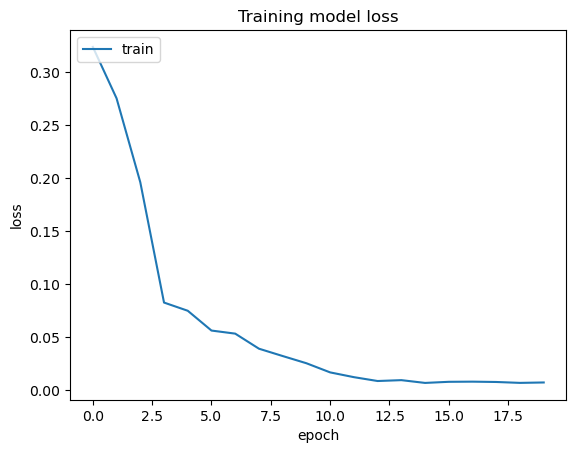

In [24]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [27]:
file_path = "D:/New folder/Quote-Equity-HAL-EQ-26-01-2024-to-26-03-2024.csv"

# Load the data
try:
    testData = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    # Ensure the file path is correct
    testData = pd.DataFrame()  # Create an empty DataFrame to avoid further errors
except pd.errors.EmptyDataError:
    print(f"Error: The file at {file_path} is empty.")
    # Ensure the file is not empty
    testData = pd.DataFrame()  # Create an empty DataFrame to avoid further errors
except Exception as e:
    print(f"An error occurred: {e}")
    testData = pd.DataFrame()  # Create an empty DataFrame to avoid further errors

# Check if the data was loaded correctly
if not data.empty:
    print("Initial DataFrame after loading:")
    print(testData.head())
    print(testData.shape)

    # Strip whitespace from column names
    testData.columns = testData.columns.str.strip()

    # Check column names
    print("\nColumn names after stripping whitespace:")
    print(testData.columns)

    # Convert 'close' column to string and remove commas
    testData['close'] = testData['close'].astype(str).str.replace(',', '')

    # Check 'close' column after removing commas
    print("\n'close' column after removing commas:")
    print(testData['close'])

    # Convert 'close' column to numeric
    testData['close'] = pd.to_numeric(testData['close'], errors='coerce')

    # Check for NaNs introduced in 'close' column
    print("\nAfter converting 'close' to numeric:")
    print(testData['close'])
    print("Number of NaNs in 'close':", testData['close'].isna().sum())

    # Drop NaN values
    testData = testData.dropna()

    # Check the DataFrame after dropping NaNs
    print("\nAfter dropping NaN values:")
    print(testData.head())
    print(testData.shape)

    # Select the desired column for trainData
    testData = testData.iloc[:, 7:8]
    print("\ntrainData:")
    print(testData)
else:
    print("The DataFrame is empty. Please check the data source and loading process.")

Initial DataFrame after loading:
         Date  series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
0  26-Mar-2024      EQ  3,193.00  3,305.00  3,180.00     3,170.80  3,300.00   
1  22-Mar-2024      EQ  3,114.05  3,209.90  3,085.00     3,121.35  3,169.00   
2  21-Mar-2024      EQ  3,024.00  3,128.45  3,020.00     2,980.50  3,117.45   
3  20-Mar-2024      EQ  3,074.00  3,080.00  2,913.60     3,058.90  2,993.00   
4  19-Mar-2024      EQ  3,111.75  3,144.40  3,034.35     3,121.95  3,060.00   

     close      vwap     52W H     52W L     VOLUME              VALUE   \
0  3,300.80  3,262.23  4,170.00  1,767.80  25,73,125  8,39,41,20,058.65   
1  3,170.80  3,152.66  4,170.00  1,767.80  20,86,220  6,57,71,32,501.05   
2  3,121.35  3,083.41  4,170.00  1,767.80  19,62,690  6,05,17,78,505.10   
3  2,980.50  2,977.95  4,170.00  1,767.80  29,75,349  8,86,04,42,942.90   
4  3,058.90  3,076.90  4,170.00  1,767.80  16,66,528  5,12,77,38,085.90   

  No of trades   
0      1,29,517  
1    

In [29]:
testData

,close
0,3300.80
1,3170.80
2,3121.35
3,2980.50
4,3058.90
5,3121.95
6,3099.10
7,3165.95
8,3039.50
9,3267.55


In [31]:
y_test = testData.iloc[0:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 1
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(40, 1, 1)

In [33]:
y_pred = model.predict(X_test)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step


array([[0.60935575],
       [0.55157024],
       [0.53027743],
       [0.471668  ],
       [0.5039213 ],
       [0.53053355],
       [0.520819  ],
       [0.54946524],
       [0.4958542 ],
       [0.5943246 ],
       [0.64187294],
       [0.6168793 ],
       [0.5767598 ],
       [0.5806669 ],
       [0.5708997 ],
       [0.54565495],
       [0.54442364],
       [0.5144642 ],
       [0.51494855],
       [0.5192958 ],
       [0.50010943],
       [0.49834314],
       [0.48191413],
       [0.45858696],
       [0.4776861 ],
       [0.48852295],
       [0.51225543],
       [0.48912007],
       [0.46221945],
       [0.4484367 ],
       [0.4184784 ],
       [0.46554136],
       [0.5200149 ],
       [0.4592684 ],
       [0.46276233],
       [0.45237383],
       [0.46770102],
       [0.4786039 ],
       [0.47935906],
       [0.48474175]], dtype=float32)

In [35]:
predicted_price = sc.inverse_transform(y_pred)

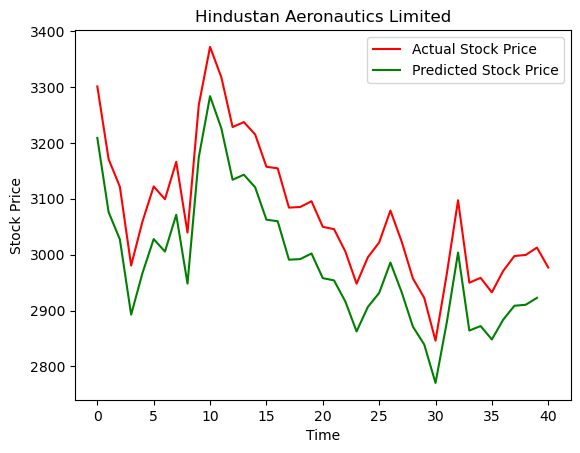

In [41]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Hindustan Aeronautics Limited')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()